# Data Gathering

### Step 1: Import data

In [41]:
#importing standard libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import random
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
from sklearn.metrics import confusion_matrix

In [42]:
cwd=os.getcwd()
pwd=os.path.dirname(cwd)
data_path=pwd+'\Dataset'


In [43]:
"""filename='\\breast-cancer-wisconsin.data' 
full_path=data_path+filename
pre,ext=os.path.splitext(full_path)
os.rename(full_path,pre+'.csv')""" # This code needs to run just once to convert the .data file to .csv
new_path=data_path+'\\breast-cancer-wisconsin.csv'

In [44]:
col_name=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data=pd.read_csv(new_path,names=col_name)

In [45]:
data.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Step 2: Data Exploration

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [47]:
data.isna().sum()
#does this mean no missing values-> let's see unique values

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [48]:
#Let's check the unique values of each column in dataframe
pd.Series({c:data[c].unique() for c in data})

Sample code number             [1000025, 1002945, 1015425, 1016277, 1017023, ...
Clump Thickness                                  [5, 3, 6, 4, 8, 1, 2, 7, 10, 9]
Uniformity of Cell Size                          [1, 4, 8, 10, 2, 3, 7, 5, 6, 9]
Uniformity of Cell Shape                         [1, 4, 8, 10, 2, 3, 5, 6, 7, 9]
Marginal Adhesion                                [1, 5, 3, 8, 10, 4, 6, 2, 9, 7]
Single Epithelial Cell Size                      [2, 7, 3, 1, 6, 4, 5, 8, 10, 9]
Bare Nuclei                                   [1, 10, 2, 4, 3, 9, 7, ?, 5, 8, 6]
Bland Chromatin                                  [3, 9, 1, 2, 4, 5, 7, 8, 6, 10]
Normal Nucleoli                                  [1, 2, 7, 4, 5, 3, 10, 6, 9, 8]
Mitoses                                             [1, 5, 4, 2, 3, 7, 10, 8, 6]
Class                                                                     [2, 4]
dtype: object

* So we see that "Bare Nuclei" has a value as "?" which is indicating the missing value-> how to deal with it?

In [49]:
#Let's see how many values are missing
print("The number of rows with missing values are=",len(data[data['Bare Nuclei']=='?']))
#Percentage of value
print((len(data[data['Bare Nuclei']=='?'])/len(data))*100)
#Hence its just 2% of the overall data and hence we can delete these rows

The number of rows with missing values are= 16
2.28898426323319


In [50]:
#Delete the missing rows
print("Before deleting:",len(data))
del_condition=data['Bare Nuclei']=='?'
data=data.drop(data[del_condition].index)
print("After deleting:",len(data))


Before deleting: 699
After deleting: 683


In [51]:
data['Class'].value_counts()
#We see that the data is pretty unbalanced as we have big difference between label counts

Class
2    444
4    239
Name: count, dtype: int64

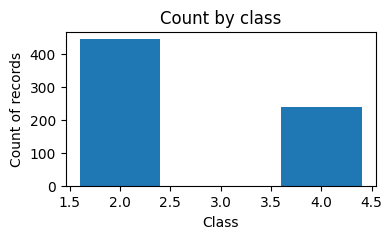

In [52]:
plt.figure(figsize=(4,2))
plt.bar(data['Class'].value_counts().index,data['Class'].value_counts().values)
plt.title("Count by class")
plt.xlabel("Class")
plt.ylabel("Count of records")
plt.show()

<p> We can use oversampling techniques like SMOTE technique which can synthesize new points</p>

In [53]:
X,Y=data.drop(['Class','Sample code number'],axis=1),data['Class']

In [54]:
X.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1


In [55]:
Y.head(3)

0    2
1    2
2    2
Name: Class, dtype: int64

In [56]:
smote=SMOTE(sampling_strategy='auto',random_state=42)
X_resample,Y_resample=smote.fit_resample(X,Y)

In [57]:
Y_resample.value_counts()

Class
2    444
4    444
Name: count, dtype: int64

In [58]:
len(X_resample)

888

<p> We now see equal number of samples</p>

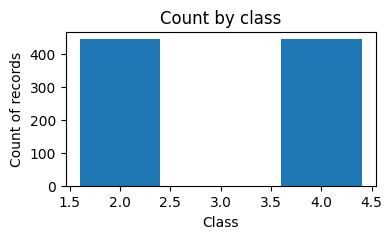

In [59]:
plt.figure(figsize=(4,2))
plt.bar(Y_resample.value_counts().index,Y_resample.value_counts().values)
plt.title("Count by class")
plt.xlabel("Class")
plt.ylabel("Count of records")
plt.show()

<p> Now to set a benchmark for model evaluation, let us create a random model which will throw random predictions </p>

In [60]:
def random_class(df):
    pred=[]
    label=[2,4]
    for i in range(len(df)):
        pred.append(random.choice(label))
    return pred
        

In [61]:
#We see that the performance is pretty worst
#Now let's split the data and try to model the data with simplest models like logistic regression
X_train,X_test,Y_train,Y_test=train_test_split(X_resample,Y_resample,test_size=0.3,stratify=Y_resample)

In [62]:
y_rand_pred=random_class(X_train)
len(y_rand_pred)
#Generating report for random predictions
report=classification_report(Y_train,y_rand_pred)
print(report)

              precision    recall  f1-score   support

           2       0.49      0.48      0.48       310
           4       0.49      0.50      0.50       311

    accuracy                           0.49       621
   macro avg       0.49      0.49      0.49       621
weighted avg       0.49      0.49      0.49       621



In [63]:
lg_class=LogisticRegression(random_state=42)
lg_class.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [64]:
Y_train.value_counts()

Class
4    311
2    310
Name: count, dtype: int64

In [65]:
y_lg_pred=lg_class.predict(X_train)
report_lg=classification_report(Y_train,y_lg_pred,zero_division=0)
print(report_lg)

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       310
           4       0.97      0.97      0.97       311

    accuracy                           0.97       621
   macro avg       0.97      0.97      0.97       621
weighted avg       0.97      0.97      0.97       621



In [66]:
#Now let's use a bit more complex model like Support Vector Machine
svc=SVC(random_state=42)
svc.fit(X_train,Y_train)


SVC(random_state=42)

In [67]:
y_svc_pred=svc.predict(X_train)
report_svc=classification_report(Y_train,y_svc_pred,zero_division=0)
print(report_svc)

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       310
           4       0.97      0.97      0.97       311

    accuracy                           0.97       621
   macro avg       0.97      0.97      0.97       621
weighted avg       0.97      0.97      0.97       621



### Improving the model

In [68]:
# We can take some necessary steps to further improve the model :
# 1. Standardize the data
# 2. Hyperparameter tuning

In [69]:
# Standardize the data
# Let's do it using a pipeline
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('svc',SVC())
])
pipe.fit(X_train,Y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [70]:
y_std_pred=pipe.predict(X_train)
report_svc_std=classification_report(Y_train,y_std_pred,zero_division=0)
print(report_svc_std)

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       310
           4       0.97      0.98      0.97       311

    accuracy                           0.97       621
   macro avg       0.97      0.97      0.97       621
weighted avg       0.97      0.97      0.97       621



In [71]:
#Let's now test the same on test dataset
y_std_test_pred=pipe.predict(X_test)
report_svc_test_std=classification_report(Y_test,y_std_test_pred,zero_division=0)
print(report_svc_test_std)

              precision    recall  f1-score   support

           2       0.98      0.97      0.97       134
           4       0.97      0.98      0.97       133

    accuracy                           0.97       267
   macro avg       0.97      0.97      0.97       267
weighted avg       0.97      0.97      0.97       267



In [72]:
corr_mat=confusion_matrix(Y_train,y_std_pred)
corr_mat

array([[299,  11],
       [  7, 304]], dtype=int64)

In [73]:
#Let's dump our model
joblib.dump(pipe,pwd+"\Models\model.pkl")

['c:\\Users\\asus\\Documents\\Projects\\Breast Cancer Prediction System\\Models\\model.pkl']